In [1]:
from glob import glob
import random
import os

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 1. Prepare data

In [2]:
ok_img_list = glob('lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/*')
len(ok_img_list)

1138

In [3]:
ok_img_list

['lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109RY1CXC2Z_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF3177C34B1CXC2D_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF3177C3JT1CXC2P_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109YM1CXC2P_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109U91CXC2D_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109SQ1CXC24_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF3177C3AT1CXC2D_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109QH1CXC2H_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109U31CXC2K_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF31369ZE71CXC2D_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109K11CXC2E_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_data

In [4]:
ng_img_list = glob('lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ng_img/*')
len(ng_img_list)

931

## Visualize data

In [5]:
def show_random_images(image_paths):
    image_paths = random.choices(image_paths, k=16)
    
    subplot_n_cols, subplot_n_rows = 4, 4

    plt.figure(figsize=(15,12))
    for idx, image_path in enumerate(image_paths):
        plt.subplot(subplot_n_rows, subplot_n_cols, idx+1)
        image = cv2.imread(os.path.join(image_path), cv2.IMREAD_GRAYSCALE)
        plt.imshow(image)

    plt.tight_layout()
    plt.show()

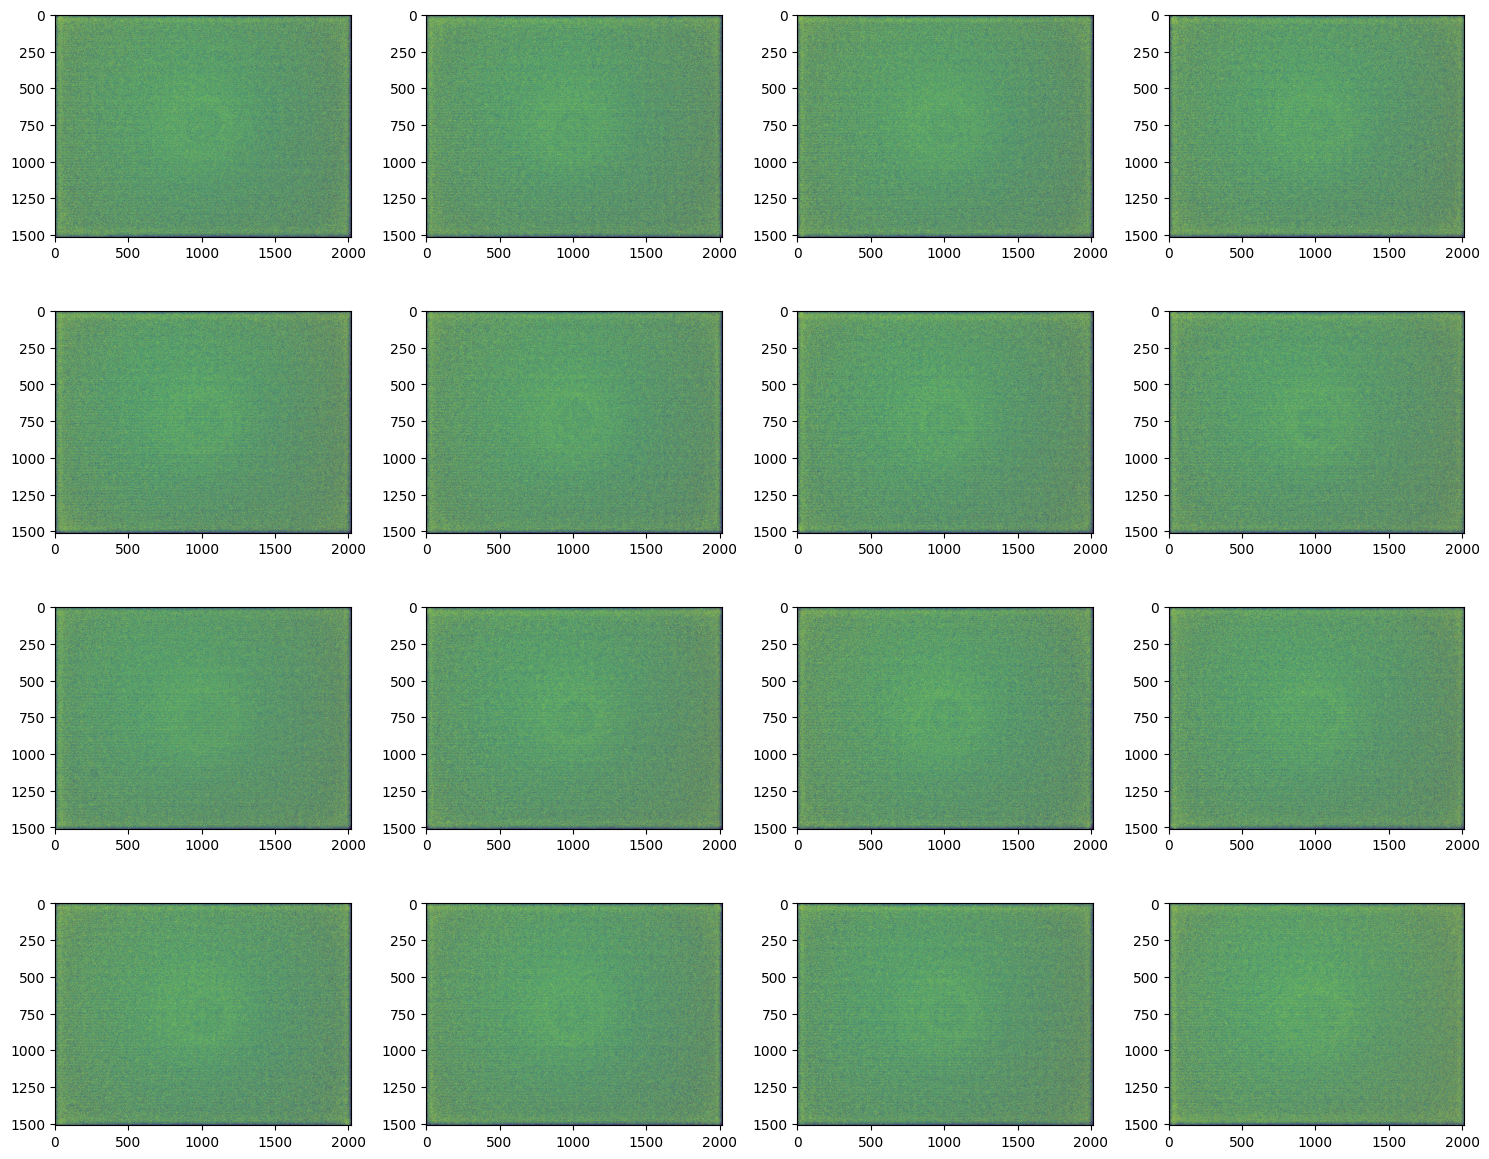

In [6]:
show_random_images(ok_img_list)

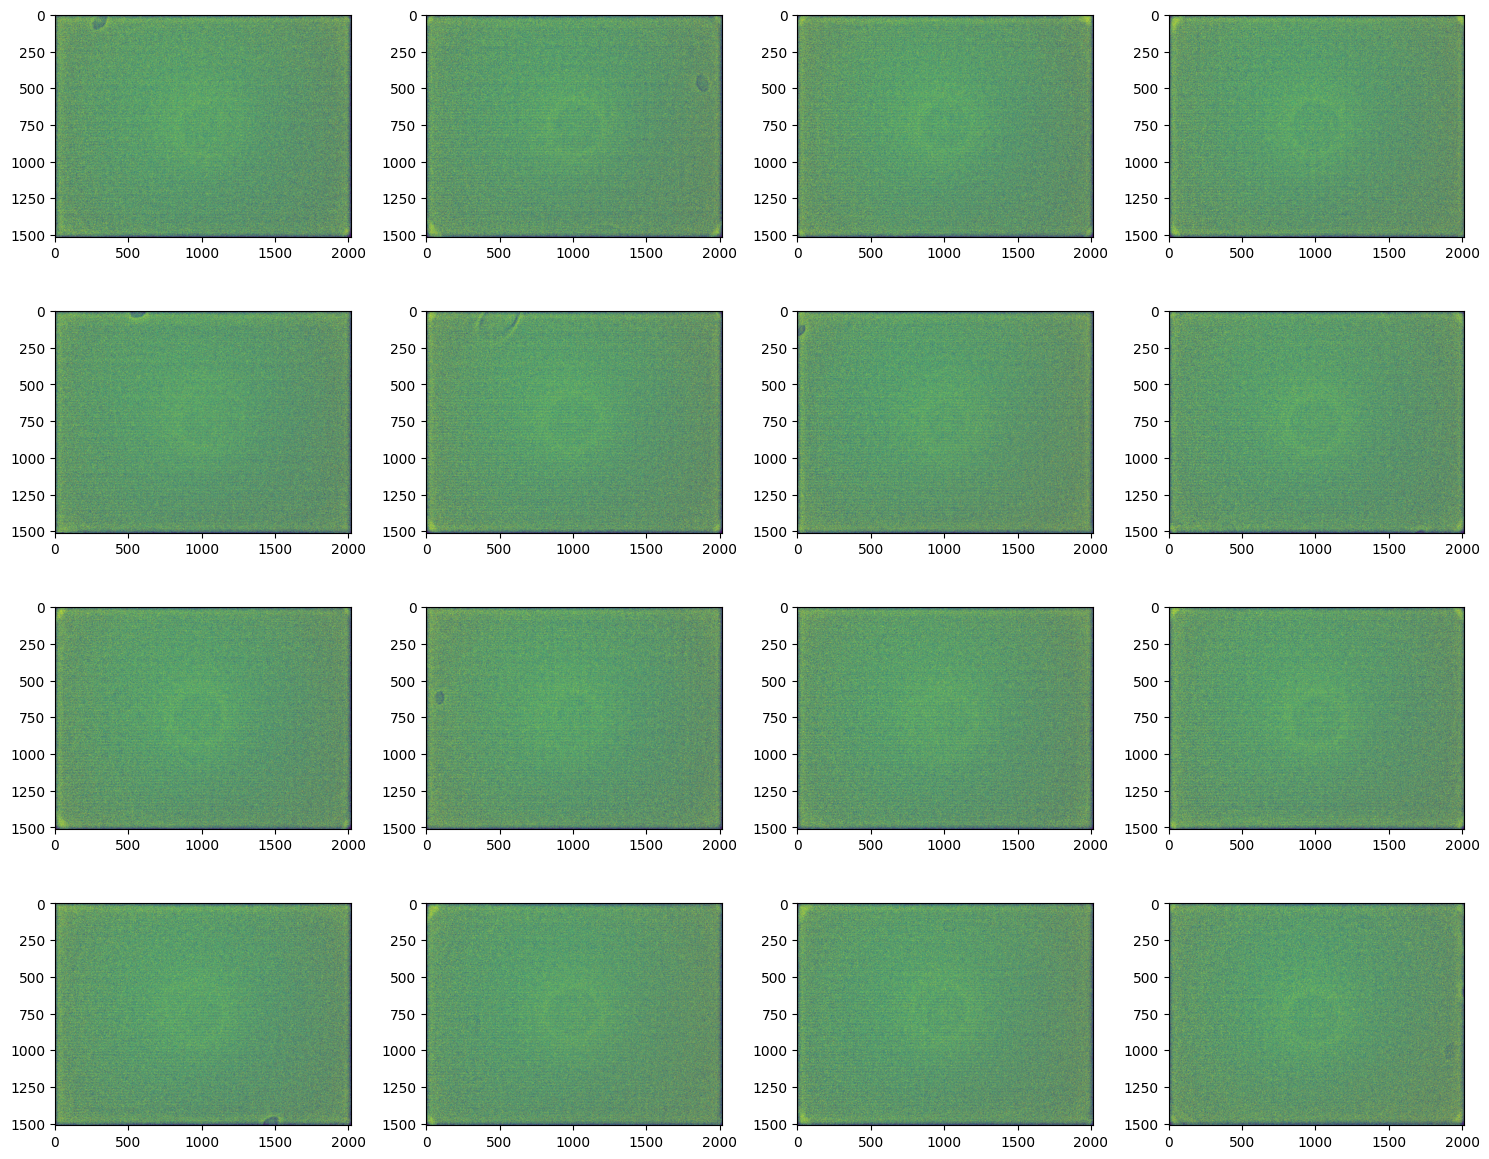

In [7]:
show_random_images(ng_img_list)

## Split data into train and val set

In [8]:
TRAIN_PERCENT = 0.8

In [9]:
shuffle_ok_img_list = random.sample(ok_img_list, len(ok_img_list))

ok_img_list_train = shuffle_ok_img_list[:int(TRAIN_PERCENT*len(ok_img_list))]
ok_img_list_val = shuffle_ok_img_list[int(TRAIN_PERCENT*len(ok_img_list)):]

ok_label_list_train = ['0'] * len(ok_img_list_train)
ok_label_list_val = ['0'] * len(ok_img_list_val)

In [10]:
len(ok_img_list_train), len(ok_label_list_train), len(ok_img_list_val), len(ok_label_list_val)

(910, 910, 228, 228)

In [11]:
shuffle_ng_img_list = random.sample(ng_img_list, len(ng_img_list))

ng_img_list_train = shuffle_ng_img_list[:int(TRAIN_PERCENT*len(ng_img_list))]
ng_img_list_val = shuffle_ng_img_list[int(TRAIN_PERCENT*len(ng_img_list)):]

ng_label_list_train = ['1'] * len(ng_img_list_train)
ng_label_list_val = ['1'] * len(ng_img_list_val)

In [12]:
len(ng_img_list_train), len(ng_label_list_train), len(ng_img_list_val), len(ng_label_list_val)

(744, 744, 187, 187)

In [13]:
img_list_train = ok_img_list_train + ng_img_list_train
label_list_train = ok_label_list_train + ng_label_list_train

img_list_val = ok_img_list_val + ng_img_list_val
label_list_val = ok_label_list_val + ng_label_list_val

In [14]:
len(img_list_train), len(label_list_train), len(img_list_val), len(label_list_val)

(1654, 1654, 415, 415)

In [15]:
img_list_train

['lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF3177C3CQ1CXC2A_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109PQ1CXC2D_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF3177C3GB1CXC2B_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109JV1CXC2P_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109JM1CXC2X_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109M41CXC25_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF3177C3EJ1CXC2A_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109QT1CXC27_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF31369ZEU1CXC2S_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109J11CXC2H_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_dataset/ok_img/GCF317109N61CXC20_HistEq_R.jpg',
 'lg_innotek_ok_ng_dataset/ng_ok_image_data

In [16]:
label_list_train

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

## Prepare Keras data generator

In [17]:
train_df = pd.DataFrame(data={
    'image_path': img_list_train,
    'label': label_list_train
})
train_df

image_path label
0     lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
1     lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
2     lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
3     lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
4     lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
...                                                 ...   ...
1649  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
1650  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
1651  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
1652  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
1653  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1

[1654 rows x 2 columns]

In [18]:
train_df = train_df.sample(frac=1)
train_df

image_path label
924   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
1287  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
66    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
188   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
969   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
...                                                 ...   ...
1247  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
764   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
488   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
597   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
696   lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0

[1654 rows x 2 columns]

In [19]:
val_df = pd.DataFrame(data={
    'image_path': img_list_val,
    'label': label_list_val
})
val_df

image_path label
0    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
1    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
2    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
3    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
4    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
..                                                 ...   ...
410  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
411  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
412  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
413  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
414  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1

[415 rows x 2 columns]

In [20]:
val_df = val_df.sample(frac=1)
val_df

image_path label
383  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
100  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
407  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
153  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
264  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
..                                                 ...   ...
5    lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
251  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
267  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1
215  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/o...     0
241  lg_innotek_ok_ng_dataset/ng_ok_image_dataset/n...     1

[415 rows x 2 columns]

In [21]:
IMAGE_SIZE = 256
BATCH_SIZE = 8

In [22]:
train_dataset = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
).flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1654 validated image filenames belonging to 2 classes.


In [23]:
val_dataset = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
).flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE * 2,
    class_mode='binary'
)

Found 414 validated image filenames belonging to 2 classes.


/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


# 2. Prepare model

In [24]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=1, activation='sigmoid')
])

model.summary()

/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,568,401 (36.50 MB)

 Trainable params: 9,568,401 (36.50 MB)

 Non-trainable params: 0 (0.00 B)

# 3. Compile and train model

In [25]:
bce_loss = BinaryCrossentropy()

In [26]:
# sgd_opt = SGD(learning_rate=0.01)
adam_opt = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-07)

In [27]:
os.makedirs('ckpt', exist_ok=True)
checkpoint = ModelCheckpoint('ckpt/model_img_classification_{epoch:02d}.h5')

In [28]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=1e-10
)

In [29]:
model.compile(loss=bce_loss, optimizer=adam_opt, metrics=[CategoricalAccuracy()])

In [30]:
NUM_EPOCH = 10

In [31]:
history = model.fit(
    x=train_dataset,
    epochs=NUM_EPOCH,
    validation_data=val_dataset,
    shuffle=True,
    callbacks=[reduce_lr]
)

/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 72s 344ms/step - categorical_accuracy: 0.5040 - loss: 0.6924 - val_categorical_accuracy: 0.4638 - val_loss: 0.6908 - learning_rate: 1.0000e-04
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 70s 339ms/step - categorical_accuracy: 0.4734 - loss: 0.6921 - val_categorical_accuracy: 0.5362 - val_loss: 0.6891 - learning_rate: 1.0000e-04
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 67s 322ms/step - categorical_accuracy: 0.5044 - loss: 0.6959 - val_categorical_accuracy: 0.4976 - val_loss: 0.6880 - learning_rate: 1.0000e-04
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 87s 420ms/step - categorical_accuracy: 0.4198 - loss: 0.6881 - val_categorical_accuracy: 0.3430 - val_loss: 0.6881 - learning_rate: 1.0000e-04
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 82s 394ms/step - categorical_accuracy: 0.4667 - loss: 0.6892 - val_categorical_accuracy: 0.5362 - val_loss: 0.6882 - learning_rate: 1.0000e-04
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 78s 376ms/step - categorical_accuracy: 0.4626

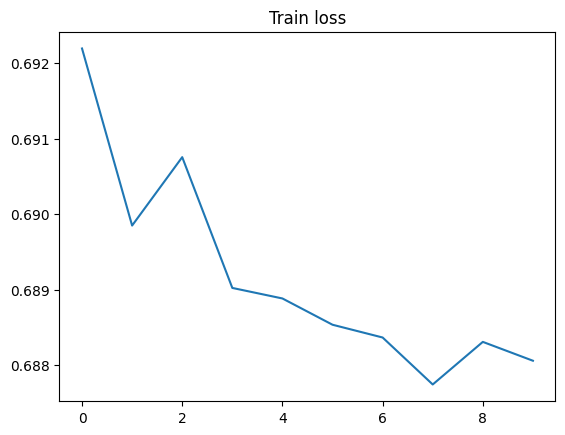

In [32]:
sns.lineplot(x=range(NUM_EPOCH), y=history.history['loss'])
plt.title('Train loss')
plt.show()

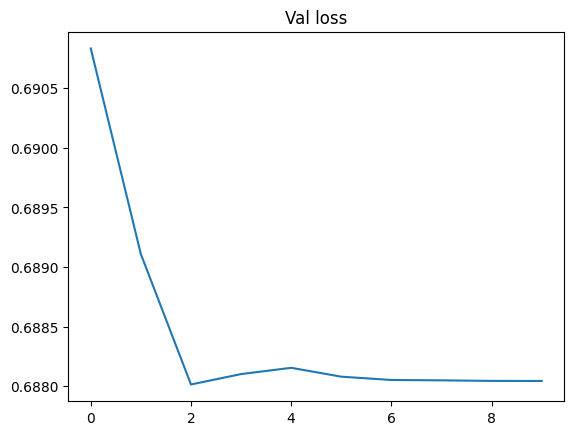

In [33]:
sns.lineplot(x=range(NUM_EPOCH), y=history.history['val_loss'])
plt.title('Val loss')
plt.show()

In [34]:
pred_prob = model.predict(val_dataset)
pred_prob

/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step


array([[0.4547704 ],
       [0.454871  ],
       [0.45485803],
       [0.45494014],
       [0.45470566],
       [0.45482418],
       [0.45471966],
       [0.45469218],
       [0.45467126],
       [0.45465064],
       [0.45485052],
       [0.45485798],
       [0.45472282],
       [0.45482203],
       [0.45480892],
       [0.45494375],
       [0.45488447],
       [0.45470574],
       [0.454816  ],
       [0.45477712],
       [0.45473954],
       [0.45455474],
       [0.45480853],
       [0.4546358 ],
       [0.4549313 ],
       [0.45478958],
       [0.45466408],
       [0.45473188],
       [0.45477208],
       [0.4547131 ],
       [0.4547419 ],
       [0.45479512],
       [0.454701  ],
       [0.45481336],
       [0.45481935],
       [0.454794  ],
       [0.45475924],
       [0.4546981 ],
       [0.45480955],
       [0.45478687],
       [0.45474765],
       [0.45483035],
       [0.45481873],
       [0.45476052],
       [0.45468432],
       [0.45469978],
       [0.45470807],
       [0.454

In [35]:
CONFIDENCE_THRESHOLD = 0.5

In [36]:
y_pred = np.where(pred_prob > CONFIDENCE_THRESHOLD, 1, 0)
y_pred = y_pred.squeeze()
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
y_label_idx = [int(i) for i in val_df.label.to_list()]

In [38]:
print(classification_report(val_dataset.labels, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       228
           1       0.00      0.00      0.00       186

    accuracy                           0.55       414
   macro avg       0.28      0.50      0.36       414
weighted avg       0.30      0.55      0.39       414



/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/keras_tf_venv/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetr